<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline: 2020-06-11 07:00:00 (Thursday)</font></h2>
<h3 align="center"><font size="5"> Total marks: 3.0</font></h3>

### Your information:
- Fullname: Dinh Viet Ha
- Date of birth: December 12th 1995
- Place of birth: Ho Chi Minh City
- Email: dinhvietha5000@gmail.com
- Mobile phone: (+84)0775632566

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Algorithm** to predict: "price of car" by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

Dataset: imports_85.csv

#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Data exploration

In [2]:
data = pd.read_csv("./imports_85.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
0     205 non-null int64
1     205 non-null object
2     205 non-null object
3     205 non-null object
4     205 non-null object
5     205 non-null object
6     205 non-null object
7     205 non-null object
8     205 non-null object
9     205 non-null float64
10    205 non-null float64
11    205 non-null float64
12    205 non-null float64
13    205 non-null int64
14    205 non-null object
15    205 non-null object
16    205 non-null int64
17    205 non-null object
18    205 non-null object
19    205 non-null object
20    205 non-null float64
21    205 non-null object
22    205 non-null object
23    205 non-null int64
24    205 non-null int64
25    205 non-null object
dtypes: float64(5), int64(5), object(16)
memory usage: 41.8+ KB


In [5]:
data.shape

(205, 26)

In [6]:
data.describe()

,0,9,10,11,12,13,16,20,23,24
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
data.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
dtype: bool

In [8]:
# Identify Variables
# Univariate Analysis
# Bi-variate Analysis
# Handle the Missing Values
# Handle Outlier Values

In [9]:
for col in data.columns:
    print(col)
    print(data[col].unique())

0
[ 3  1  2  0 -1 -2]
1
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
2
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
3
['gas' 'diesel']
4
['std' 'turbo']
5
['two' 'four' '?']
6
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
7
['rwd' 'fwd' '4wd']
8
['front' 'rear']
9
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.

In [10]:
data = data.replace("?",np.nan)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
data.isnull().sum()

0      0
1     41
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
25     4
dtype: int64

In [12]:
attributes = ["symboling",'normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
             'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders',
             'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',
             'price']
data.columns = attributes

In [13]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Attribute Determination

|Type of variable|Data Type|Variable Category|
|----------------|---------|-----------------|
|Predictor variable|Character|Categorical|
|<ul><li>highway-mpg</li><li>horsepower</li><li>engine-size</li><li>curb weight</li></ul>|<ul><li>make</li><li>fuel-type</li><li>aspiration</li><li>body-style</li><li>drive-wheels</li><li>engine-location</li><li>engine-type</li><li>fuel-system</li><li>make</li></ul>|<ul><li>make</li><li>fuel-type</li><li>aspiration</li><li>body-style</li><li>drive-wheels</li><li>engine-location</li><li>engine-type</li><li>fuel-system</li><li>make</li></ul>|
|Target Variable|Numeric|Continuous|
|<ul><li>Price</li></ul>|<ul><li>Price</li><li>highway-mpg</li><li>horsepower</li><li>engine-size</li><li>curb weight</li></ul>|<ul><li>Price</li><li>highway-mpg</li><li>horsepower</li><li>engine-size</li><li>curb weight</li></ul>|

We will use continuous variables: **highway-mpg, horsepower, engine-size and curb weight** to predict **price** of automobiles. Therefore, we will conduct analysis for these continuous variables only.

# Univariate Analysis

## Continuous Variables

### Distribution

In [14]:
import seaborn as sns

In [15]:
for col in ["symboling",'normalized-losses','wheel-base','length','width','height','curb-weight',
             'engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',
             'price']:
    data[col] = pd.to_numeric(data[col])

In [16]:
def dist_plot(data):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.hist(data.dropna())
    plt.subplot(1,2,2)
    sns.distplot(data.dropna())

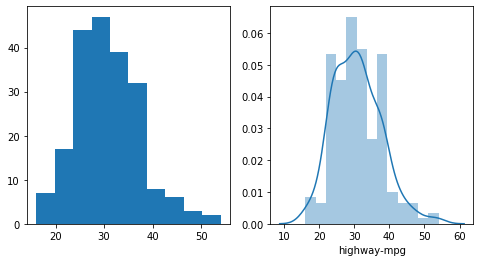

In [17]:
dist_plot(data["highway-mpg"])
plt.show()

Highway-mpg concentrated from 22 to 40, distribution skewed right, is almost normal.

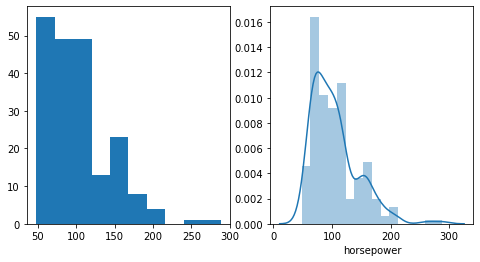

In [18]:
dist_plot(data["horsepower"])
plt.show()

Horsepower concentrated from 60 to 120, distribution skewed right.

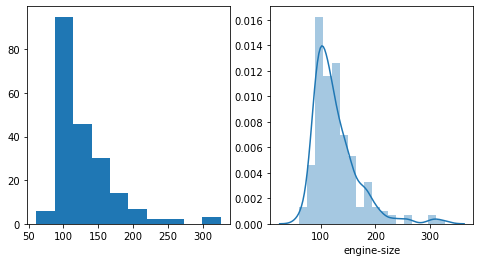

In [19]:
dist_plot(data["engine-size"])
plt.show()

Engine-size concentrated from 100 to 150, distribution skewed right.

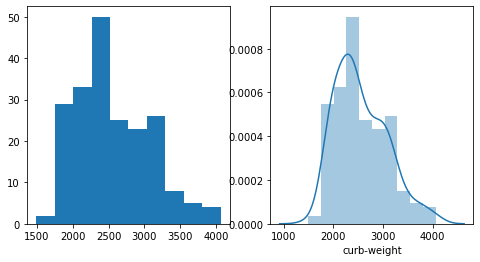

In [20]:
dist_plot(data['curb-weight'])
plt.show()

Curb-weight concentrated from 1750 to 3250, distribution skewed right, is almost normal.

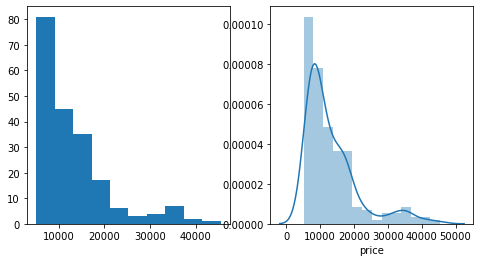

In [21]:
dist_plot(data["price"])
plt.show()

Price concentrated from 5000 to 20000, distribution skewed right.

### Central Tendency

In [22]:
from scipy import stats

In [23]:
for var in ['highway-mpg','horsepower','engine-size','curb-weight','price']:
    print("\nCentral tendency of " + var + ":")
    print("- Mean: ", round(np.mean(data[var][data[var].notnull()]) ,3))
    print("- Median: ", np.median(data[var][data[var].notnull()]))
    print("- Mode: ", stats.mode(data[var][data[var].notnull()])[0])
    print("- Min: ", np.min(data[var][data[var].notnull()]))
    print("- Max: ", np.max(data[var][data[var].notnull()]))


Central tendency of highway-mpg:
- Mean:  30.751
- Median:  30.0
- Mode:  [25]
- Min:  16
- Max:  54

Central tendency of horsepower:
- Mean:  104.256
- Median:  95.0
- Mode:  [68.]
- Min:  48.0
- Max:  288.0

Central tendency of engine-size:
- Mean:  126.907
- Median:  120.0
- Mode:  [92]
- Min:  61
- Max:  326

Central tendency of curb-weight:
- Mean:  2555.566
- Median:  2414.0
- Mode:  [2385]
- Min:  1488
- Max:  4066

Central tendency of price:
- Mean:  13207.129
- Median:  10295.0
- Mode:  [5572.]
- Min:  5118.0
- Max:  45400.0


# Bivariate Analysis

## Continuous Variables

### Correlation

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


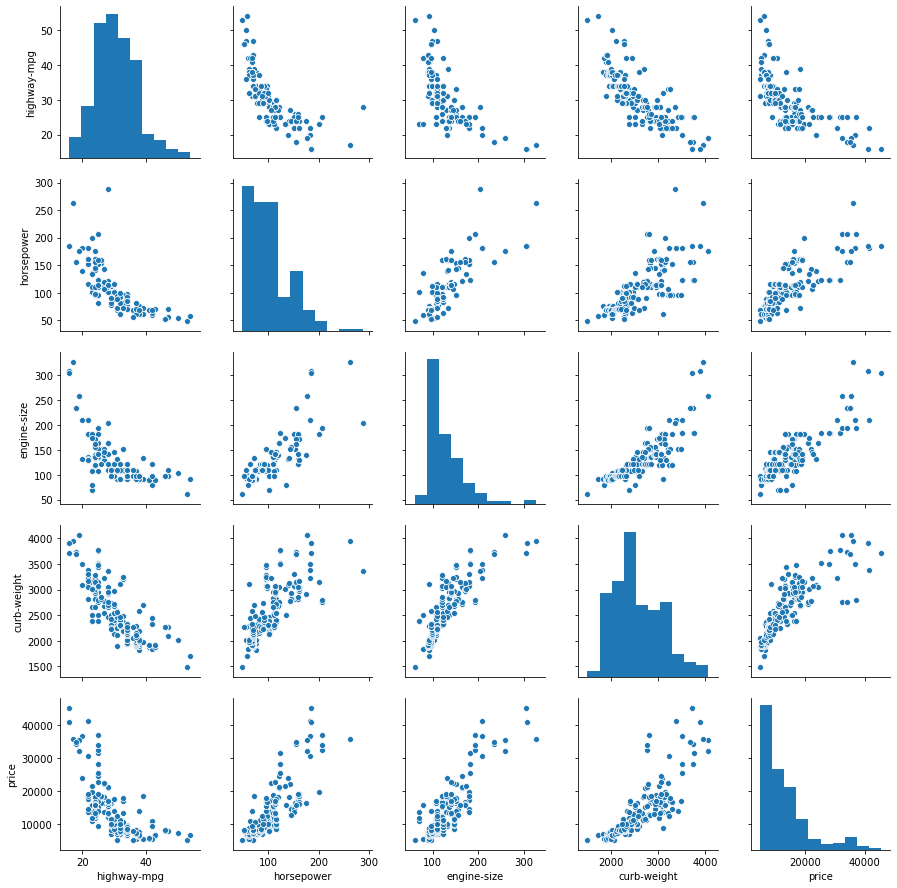

In [24]:
sns.pairplot(data[['highway-mpg','horsepower','engine-size','curb-weight','price']], dropna=True)
plt.show()

**Comment**

Variables of highway-mpg, horsepower, engine-size, curb-weight and price have linear or could be non-linear relationship with each other.

Highway-mpg has negative relationship with price, horsepower, engine-size and curb-weight.

Horsepower, engine-size and curb-weight have positive relationship with price and positive relationship with each other.

### Handling Missing Values

Of all five continuous varibles, horsepower and price have null values.

Horsepower

In [25]:
index_null_HP = data['horsepower'][data['horsepower'].isna()]
index_null_HP

130   NaN
131   NaN
Name: horsepower, dtype: float64

In [26]:
data['horsepower'][index_null_HP.index] = np.mean(data['horsepower'])

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
data['horsepower'].isna().any()

False

In [28]:
np.corrcoef(data['engine-size'], data['horsepower'])

array([[1.        , 0.81071253],
       [0.81071253, 1.        ]])

Price

In [29]:
index_null_P = data['price'][data['price'].isna()]
index_null_P

9     NaN
44    NaN
45    NaN
129   NaN
Name: price, dtype: float64

In [30]:
data['price'][index_null_P.index] = np.mean(data['price'])

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
data['price'].isna().any()

False

### Handling Outliers

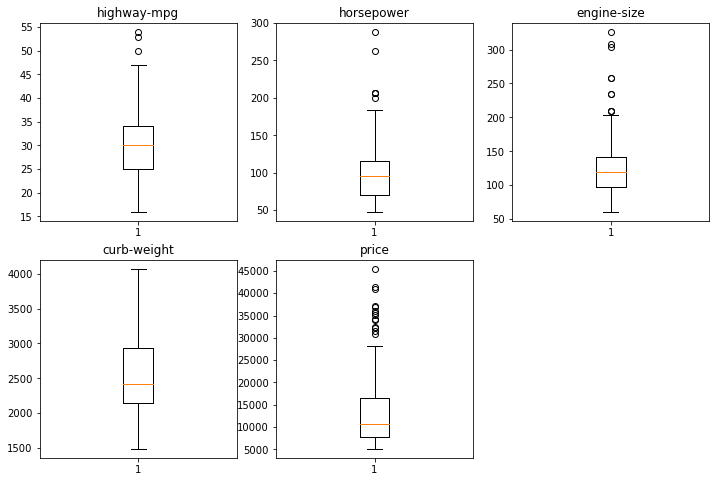

In [32]:
fig, axes = plt.subplots(figsize=(12,8),ncols=3,nrows=2)

axes[0,0].boxplot(data['highway-mpg'])
axes[0,0].set_title("highway-mpg")

axes[0,1].boxplot(data['horsepower'])
axes[0,1].set_title('horsepower')

axes[0,2].boxplot(data['engine-size'])
axes[0,2].set_title('engine-size')

axes[1,0].boxplot(data['curb-weight'])
axes[1,0].set_title('curb-weight')

axes[1,1].boxplot(data['price'])
axes[1,1].set_title('price')

axes[1,2].set_visible(False)
plt.show()

Except for curb-weight, all other four variables have upper outliers.

We can see that there are 2 points which lie as outliers in all highway-mpg, horsepower, engine-size and price. Thus, these 2 points can be removed while the other outliers can be compacted to the dataset. 

In [33]:
price_q1, price_q3 = np.percentile(data['price'], (25,75))
price_iqr = stats.iqr(data['price'])
outliers_p = data['price'][(data['price'] > (price_q3 + 3*price_iqr))]
outliers_p

74    45400.0
Name: price, dtype: float64

In [34]:
data['price'][np.abs(stats.zscore(data['price'])) > 3] 

16     41315.0
17     36880.0
73     40960.0
74     45400.0
128    37028.0
Name: price, dtype: float64

In [35]:
data['highway-mpg'][np.abs(stats.zscore(data['highway-mpg'])) > 3] 

18    53
30    54
Name: highway-mpg, dtype: int64

In [36]:
data['engine-size'][np.abs(stats.zscore(data['engine-size'])) > 3] 

47    258
48    258
49    326
73    308
74    304
Name: engine-size, dtype: int64

In [37]:
outliers_HP = data['horsepower'][np.abs(stats.zscore(data['horsepower'])) > 3] 
outliers_HP

49     262.0
129    288.0
Name: horsepower, dtype: float64

In [38]:
data_new = data.drop(index=outliers_HP.index)

In [39]:
data_new.shape

(203, 26)

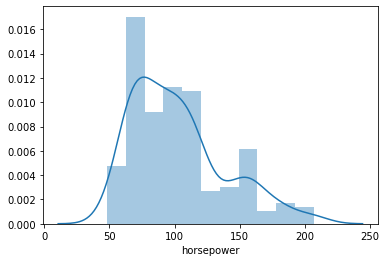

In [40]:
sns.distplot(data_new['horsepower'])

# Pre-processing: Feature selection/extraction¶

## Normalize Data

In [41]:
np.corrcoef(data_new['highway-mpg'],data_new['price'])

array([[ 1.        , -0.68315209],
       [-0.68315209,  1.        ]])

In [42]:
highway_price = data_new[['highway-mpg','price']]

In [43]:
scaler = preprocessing.RobustScaler()
robust_scaler = scaler.fit_transform(highway_price)
df_hi_pr = pd.DataFrame(robust_scaler, columns=['highway-mpg','price'])
df_hi_pr.head()

,highway-mpg,price
0,-0.3,0.362757
1,-0.3,0.708816
2,-0.4,0.708816
3,0.0,0.415155
4,-0.8,0.818218


In [44]:
df_hi_pr.corr()

,highway-mpg,price
highway-mpg,1.000000,-0.683152
price,-0.683152,1.000000


In [45]:
np.corrcoef(data_new['horsepower'], data_new['price'])

array([[1.        , 0.79307115],
       [0.79307115, 1.        ]])

In [46]:
ho_pr = data_new[['horsepower','price']]

In [47]:
ho_pr_robust = scaler.fit_transform(ho_pr)
df_ho_pr = pd.DataFrame(ho_pr_robust, columns=['horsepower','price'])
df_ho_pr.head()

,horsepower,price
0,0.347826,0.362757
1,0.347826,0.708816
2,1.282609,0.708816
3,0.152174,0.415155
4,0.434783,0.818218


In [48]:
df_ho_pr.corr()

,horsepower,price
horsepower,1.000000,0.793071
price,0.793071,1.000000


After applying robust scaler on two pairs : horsepower and price, highway-mpg and price, we found that scaler does not increase the correlation within each pair. Therefore, there is no need for scaling.

Because there are no categorical variables considered for modeling, we do not need to do encoding for categorical variables.

# Simple linear regression

Predict **price** from **highway-mpg**

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
y = data_new['price']
X = data_new[['highway-mpg']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train.shape

(162, 1)

In [53]:
X_test.shape

(41, 1)

In [54]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lm.score(X_train,y_train)

0.5578742102431972

In [57]:
lm.score(X_test, y_test)

0.19327572562539685

In [58]:
lm.score(X,y)

0.46002376438167497

There is a difference of 0.36 between score of training and testing set.
46% variation of dataset can be explained by this model.

In [59]:
b = lm.intercept_
b

37734.34377572038

In [60]:
m = lm.coef_[0]
m

-817.034105641565

y = mx + b

price = -817.03*highway-mpg + 37734.34

In [61]:
yHat_train = lm.predict(X_train)
yHat_test = lm.predict(X_test)

In [62]:
reg_line = [(m* float(x)) + b for x in np.array(X)]

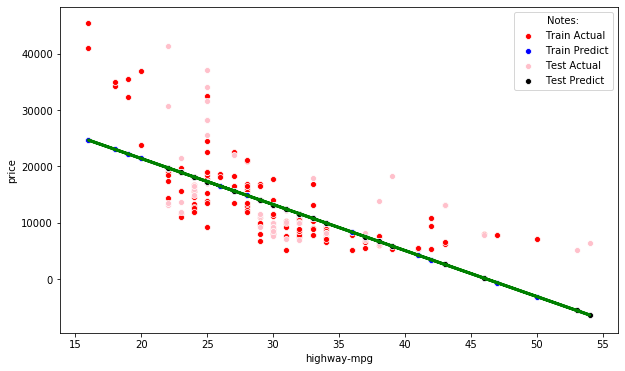

In [63]:
plt.figure(figsize=(10,6))
plt.plot(X, reg_line, color="green", linewidth=3)
sns.scatterplot(X_train["highway-mpg"], y_train, color="red", label="Train Actual")
sns.scatterplot(X_train["highway-mpg"], yHat_train, color="blue", label="Train Predict")
sns.scatterplot(X_test["highway-mpg"], y_test, color="pink", label="Test Actual", )
sns.scatterplot(X_test["highway-mpg"], yHat_test, color="black", label="Test Predict")
plt.xlabel("highway-mpg")
plt.ylabel("price")
plt.legend(title="Notes:")

plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lm.predict(X))
print("The mean squared error is: ", mse)

The mean squared error is:  32209977.59317432


In [65]:
print("The R^2 is: ", lm.score(X,y))

The R^2 is:  0.46002376438167497


In [66]:
X_new = np.arange(1,100,1).reshape(-1,1)

In [67]:
yHat_new = lm.predict(X_new)
yHat_new[:5]

array([36917.30967008, 36100.27556444, 35283.2414588 , 34466.20735315,
       33649.17324751])

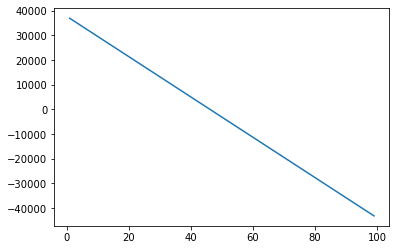

In [68]:
plt.plot(X_new, yHat_new)
plt.show()

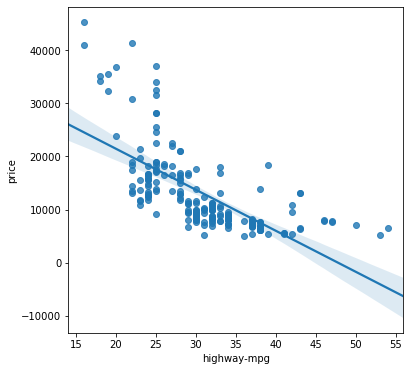

In [69]:
plt.figure(figsize=(6,6))
sns.regplot(x="highway-mpg", y="price", data=data_new)
plt.show()

There are 3 groups of points which lie far from the regression line --> This linear model is not suitable.

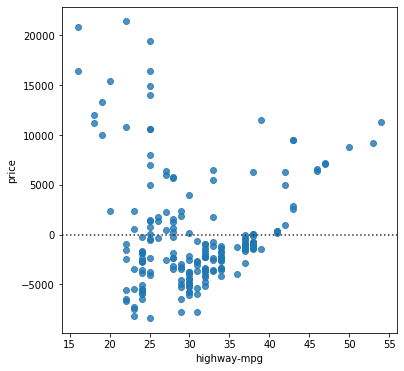

In [70]:
plt.figure(figsize=(6,6))
sns.residplot(x="highway-mpg", y="price", data=data_new)
plt.show()

The residual is not aligned along the x axis. This implies a non-linear model should fit better into the dataset. 

In [71]:
y_pred = lm.predict(X)

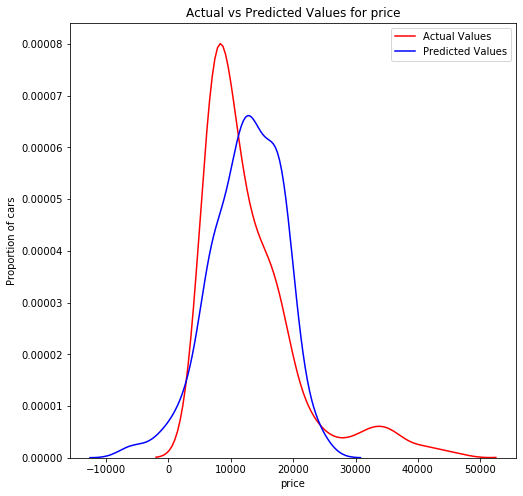

In [72]:
plt.figure(figsize=(8,8))
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Values")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax1)

plt.title("Actual vs Predicted Values for price")
plt.xlabel("price")
plt.ylabel("Proportion of cars")

plt.show()
plt.close()

The actual distribution skewed right, while the predicted distrbution skewed left. The predicted values are much lower than the actual one.

In [73]:
df_compare_LR = pd.DataFrame({"Actual": y.values, "Predicted": y_pred})
df_compare_LR.head()

,Actual,Predicted
0,13495.0,15674.422923
1,16500.0,15674.422923
2,16500.0,16491.457029
3,13950.0,13223.320606
4,17450.0,19759.593452


#### Overfitting, Underfitting and Model Selection

In [74]:
def distribution_plot(RedFunction, BlueFunction, RedName, BlueName, Title):
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName)
    
    plt.title(Title)
    plt.xlabel("Price")
    plt.ylabel("Proportion")

In [75]:
yhat_train = lm.predict(X_train)
yhat_test = lm.predict(X_test)

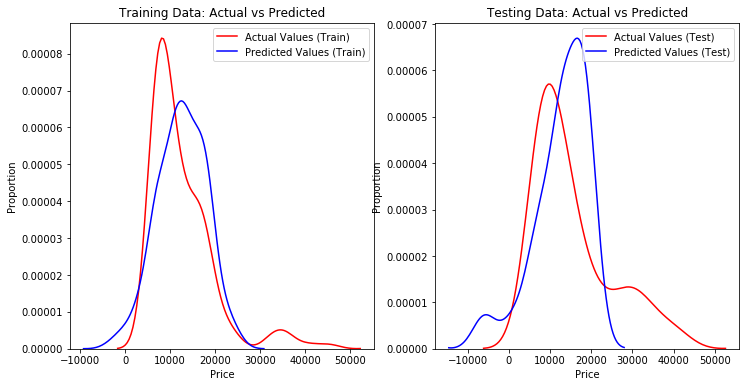

In [76]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
Title = "Training Data: Actual vs Predicted"
distribution_plot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
plt.subplot(1,2,2)
Title = "Testing Data: Actual vs Predicted"
distribution_plot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)
plt.show()

In [77]:
y_train_mean = y_train.mean()
yhat_train_mean = yhat_train.mean()
display(y_train_mean, yhat_train_mean)

12512.19832934095

12512.198329340956

In [78]:
y_train_std = y_train.std()
yhat_train_std = yhat_train.std()
display(y_train_std, yhat_train_std)

7161.30865302462

5332.317070180516

In [79]:
y_test_mean = y_test.mean()
yhat_test_mean = yhat_test.mean()
display(y_test_mean,yhat_test_mean)

15397.03070015775

12665.34609530358

In [80]:
y_test_std = y_test.std()
yhat_test_std = yhat_test.std()
display(y_test_std, yhat_test_std)

9460.472810410289

6474.803455522552

**Comment:** 

* Training Data: Mean of predicted values euals actual values, stadard deviation of predicted values smaller than actual one by 2000. This explains the distribution of predicted values is left-skewed while the actual one is right-skewed.
* Testing Data: Mean of predicted values < actual values by 2700, stadard deviation of predicted values smaller than actual one by 3000. This explains the distribution of predicted values is higher than that of the actual.
* The fitting in training set is better than in testing set, as seen from the graph.

## Cross validation

In [102]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [103]:
Rcross = cross_val_score(lm, X,y,cv=4)
Rcross

array([0.47783779, 0.50068581, 0.35094916, 0.22011905])

In [104]:
print("The mean of the folds are ", Rcross.mean(), "and the standard deviation is ", Rcross.std())

The mean of the folds are  0.38739795168660746 and the standard deviation is  0.11216533462391316


In [105]:
-1 * cross_val_score(lm, X, y, cv=4, scoring="neg_mean_squared_error")

array([40853729.65381513, 45311699.35282689, 31647781.71744841,
       14392766.02589777])

In [106]:
yHat = cross_val_predict(lm,X,y,cv=4)
yHat[0:5]

array([15700.64582386, 15700.64582386, 16476.22227382, 13373.91647399,
       19578.52807365])

In [107]:
df_compare = pd.DataFrame({"Actual": y.values, "Predicted": yHat})
df_compare.head()

,Actual,Predicted
0,13495.0,15700.645824
1,16500.0,15700.645824
2,16500.0,16476.222274
3,13950.0,13373.916474
4,17450.0,19578.528074


# Multiple Linear Regression

Predict **price** from **horsepower, curb-weight, engine-size, highway-mpg**

In [81]:
lm1 = LinearRegression()

In [82]:
X1 = data_new[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y1 = data_new['price']

In [83]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [84]:
X1_train.shape

(162, 4)

In [85]:
X1_test.shape

(41, 4)

In [86]:
lm1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
lm1.score(X1_train,y1_train)

0.8296838044067517

In [88]:
lm1.score(X1_test, y1_test)

0.6805943398584626

In [89]:
lm1.score(X1,y1)

0.7894358185695141

There is a difference of 0.15 in the score of training and testing set.

78.9% variation of the whole dataset can be explained by this multiple linear model.

In [90]:
yhat1=lm1.predict(X1)
yhat1[0:5]

array([13852.31981762, 13852.31981762, 18438.01782478, 10612.40562979,
       15761.14288558])

In [91]:
df2_compare_LR = pd.DataFrame({"Actual": y.values,"Predicted": yhat1})
df2_compare_LR.head()

,Actual,Predicted
0,13495.0,13852.319818
1,16500.0,13852.319818
2,16500.0,18438.017825
3,13950.0,10612.405630
4,17450.0,15761.142886


In [92]:
a1 = lm1.intercept_
b1 = lm1.coef_
a1, b1

(-8199.243619810895,
 array([ 35.84885823,   2.83958387,  99.37360776, -77.09216804]))

price = -8199.24 + 35.84* horsepower + 2.84* curb-weight + 99.37* engine-size - 77.09* highway-mpg

In [93]:
mse1 = mean_squared_error(y1, lm1.predict(X1))
print("The mean squared error is: ", mse1)

The mean squared error is:  12560307.506930737


In [94]:
print("The R^2 is: ", lm1.score(X1,y1))

The R^2 is:  0.7894358185695141


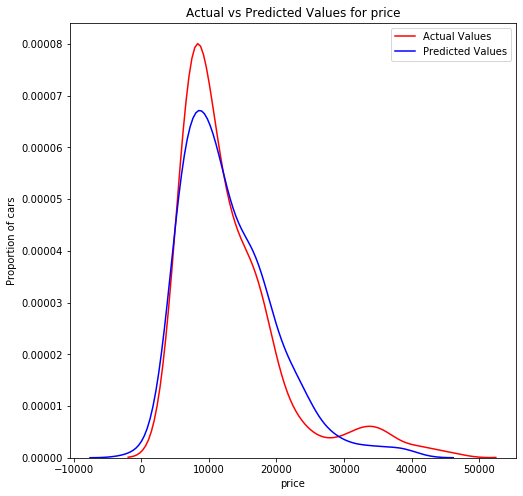

In [95]:
plt.figure(figsize=(8,8))
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Values")
sns.distplot(yhat1, hist=False, color="b", label="Predicted Values", ax=ax1)

plt.title("Actual vs Predicted Values for price")
plt.xlabel("price")
plt.ylabel("Proportion of cars")

plt.show()
plt.close()

The multiple linear regression model fits better to the dataset, as the predicted values come closer to the actual values. However, the top and right skew of the predicted distribution still have not fully fitted to the actual one. This raises improvement on the model, possibly a non-linear regression model.

In [96]:
y1hat_train = lm1.predict(X1_train)
y1hat_test = lm1.predict(X1_test)

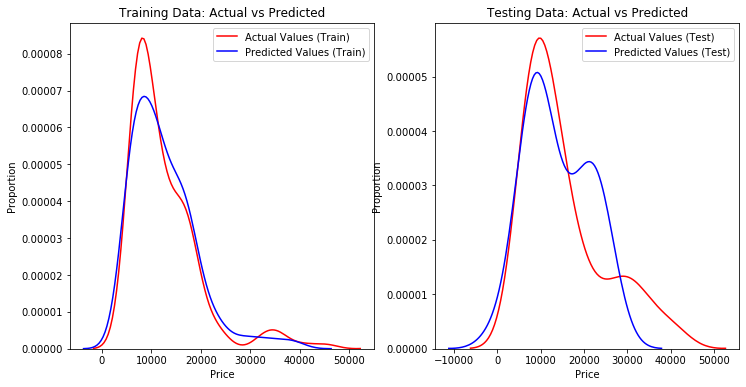

In [97]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
Title = "Training Data: Actual vs Predicted"
distribution_plot(y1_train, y1hat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
plt.subplot(1,2,2)
Title = "Testing Data: Actual vs Predicted"
distribution_plot(y1_test, y1hat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)
plt.show()

In [98]:
y1_train_mean = y1_train.mean()
y1hat_train_mean = y1hat_train.mean()
display(y1_train_mean, y1hat_train_mean)

12512.19832934095

12512.198329340954

In [99]:
y1_train_std = y1_train.std()
y1hat_train_std = y1hat_train.std()
display(y1_train_std, y1hat_train_std)

7161.30865302462

6502.855884511278

In [100]:
y1_test_mean = y1_test.mean()
y1hat_test_mean = y1hat_test.mean()
display(y1_test_mean,y1hat_test_mean)

15397.03070015775

13954.00016955372

In [101]:
y1_test_std = y1_test.std()
y1hat_test_std = y1hat_test.std()
display(y1_test_std, y1hat_test_std)

9460.472810410289

7113.977845777145

**Comment:** 

* Training Data: Mean of predicted values equal actual values, stadard deviation of predicted values smaller than actual one by 600. These differences are small compared the scale of price values.
* Testing Data: Mean of predicted values smaller than that of actual values by 1100, stadard deviation of predicted values smaller than actual one by 2000. 
* The fitting in training set is better than in testing set with minor differences, as seen from the graph.
* The difference between predicted curve and actual curve is more clearly for the testing set.

# Report

Predict **price** using **highway-mpg**
* Only 46% variation of the dataset can be explained using simple linear model.

Predict **price** using **horsepower, curb-weight, engine-size, highway-mpg**.

* 79 % variation of the whole dataset can be explained using this multiple linear regression model. 

**Conclusion**: Multiple linear model is better than Simple linear model to predict price if cars. 